In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 1000


age = np.random.randint(18, 65, size=n)
income = np.random.randint(10000, 150000, size=n)
time_on_website = np.round(np.random.normal(loc=20, scale=10, size=n), 2)
previous_purchases = np.random.poisson(lam=1.5, size=n)
marketing_engaged = np.random.choice([0, 1], size=n, p=[0.4, 0.6])
search_frequency = np.random.randint(0, 20, size=n)
device_age = np.round(np.clip(np.random.normal(loc=2.5, scale=1.0, size=n), 0.2, 5.0), 1)


brands = ['iPhone', 'Samsung', 'OnePlus', 'Xiaomi', 'Realme', 'Oppo', 'Vivo', 'Nothing', 'Google Pixel']
brand = np.random.choice(brands, size=n)

# Target variable
purchase_probability = (
    (income > 40000).astype(int) * 0.2 +
    (time_on_website > 15).astype(int) * 0.3 +
    (previous_purchases > 0).astype(int) * 0.2 +
    marketing_engaged * 0.2 +
    (search_frequency > 5).astype(int) * 0.1 +
    (device_age > 2).astype(int) * 0.1
)

purchase_probability = np.clip(purchase_probability, 0, 1)
will_purchase = (np.random.rand(n) < purchase_probability).astype(int)


df = pd.DataFrame({
    'age': age,
    'income': income,
    'time_on_website': time_on_website,
    'previous_purchases': previous_purchases,
    'marketing_engaged': marketing_engaged,
    'search_frequency': search_frequency,
    'device_age': device_age,
    'brand': brand,
    'will_purchase': will_purchase
})

df.to_csv('smartphone_purchase_data.csv', index=False)
print("✅ Updated dataset saved as 'smartphone_purchase_data.csv' with brand visuals")

✅ Updated dataset saved as 'smartphone_purchase_data.csv' with brand visuals


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("smartphone_purchase_data.csv")

df.head()

,age,income,time_on_website,previous_purchases,marketing_engaged,search_frequency,device_age,brand,will_purchase
0,56,126748,29.19,3,1,4,2.0,iPhone,1
1,46,15287,17.10,1,1,17,1.7,Realme,1
2,32,18512,22.67,1,1,15,1.3,OnePlus,1
3,60,142414,23.22,1,0,7,2.5,Samsung,0
4,25,118872,13.32,2,1,19,3.7,Nothing,1


In [4]:
df.info()

print("\nMissing values:\n", df.isnull().sum())

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int64  
 1   income              1000 non-null   int64  
 2   time_on_website     1000 non-null   float64
 3   previous_purchases  1000 non-null   int64  
 4   marketing_engaged   1000 non-null   int64  
 5   search_frequency    1000 non-null   int64  
 6   device_age          1000 non-null   float64
 7   brand               1000 non-null   object 
 8   will_purchase       1000 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 70.4+ KB

Missing values:
 age                   0
income                0
time_on_website       0
previous_purchases    0
marketing_engaged     0
search_frequency      0
device_age            0
brand                 0
will_purchase         0
dtype: int64


,age,income,time_on_website,previous_purchases,marketing_engaged,search_frequency,device_age,will_purchase
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.986000,81228.252000,20.264930,1.488000,0.599000,9.601000,2.443300,0.76800
std,13.497852,40346.642563,9.837834,1.203871,0.490346,5.772445,1.028948,0.42232
min,18.000000,10126.000000,-10.200000,0.000000,0.000000,0.000000,0.200000,0.00000
25%,29.000000,46014.750000,13.835000,1.000000,0.000000,5.000000,1.700000,1.00000
50%,42.000000,81813.000000,20.065000,1.000000,1.000000,10.000000,2.400000,1.00000
75%,52.000000,116032.250000,26.782500,2.000000,1.000000,15.000000,3.100000,1.00000
max,64.000000,149999.000000,51.930000,6.000000,1.000000,19.000000,5.000000,1.00000


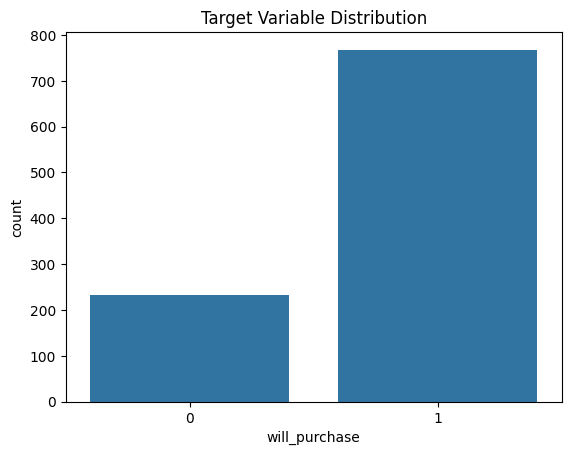

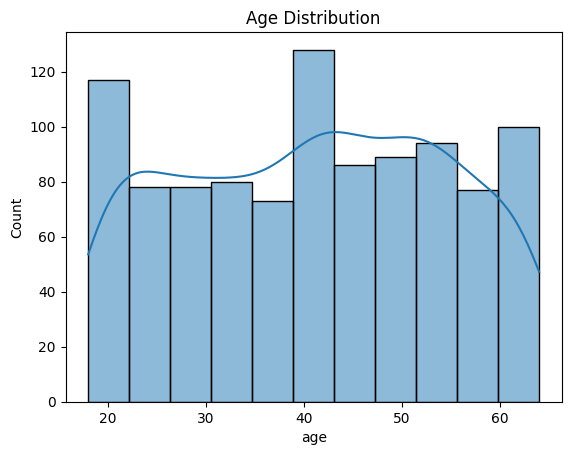

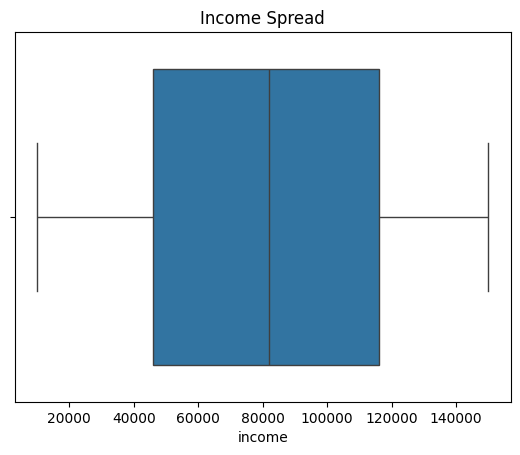

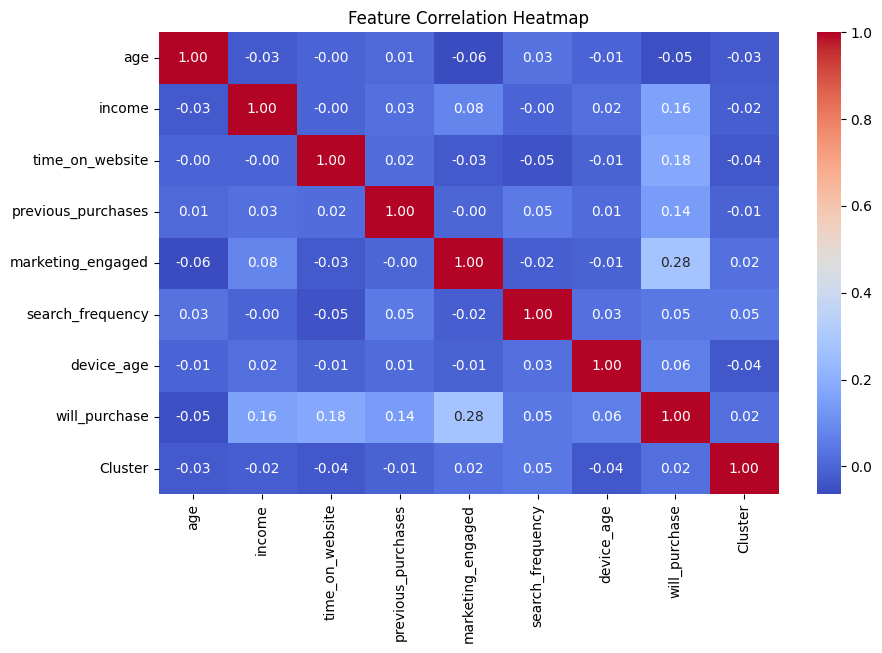

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='will_purchase', data=df)
plt.title("Target Variable Distribution")
plt.show()

sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='income', data=df)
plt.title("Income Spread")
plt.show()


numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X_train.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

📊 Logistic Regression Accuracy: 0.7350
              precision    recall  f1-score   support

           0       0.68      0.25      0.36        61
           1       0.74      0.95      0.83       139

    accuracy                           0.73       200
   macro avg       0.71      0.60      0.60       200
weighted avg       0.72      0.73      0.69       200

--------------------------------------------------
📊 Random Forest Accuracy: 0.7350
              precision    recall  f1-score   support

           0       0.67      0.26      0.38        61
           1       0.74      0.94      0.83       139

    accuracy                           0.73       200
   macro avg       0.71      0.60      0.60       200
weighted avg       0.72      0.73      0.69       200

--------------------------------------------------
📊 SVM Accuracy: 0.7050
              precision    recall  f1-score   support

           0       0.67      0.07      0.12        61
           1       0.71      0.99      0

              precision    recall  f1-score   support

           0       0.51      0.36      0.42        61
           1       0.75      0.85      0.80       139

    accuracy                           0.70       200
   macro avg       0.63      0.60      0.61       200
weighted avg       0.68      0.70      0.68       200



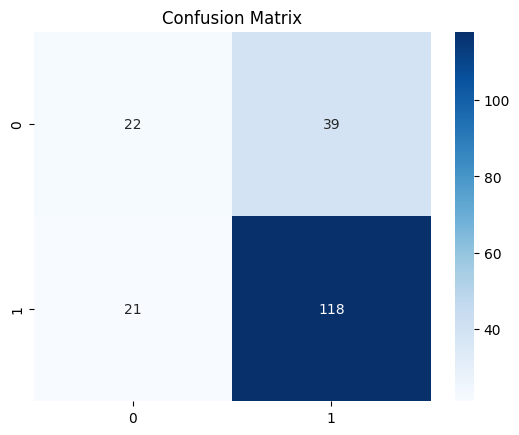

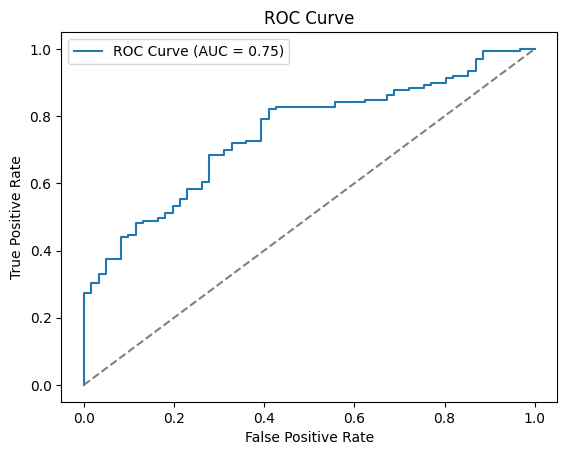

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt


y_pred = xgb.predict(X_test_scaled)
y_prob = xgb.predict_proba(X_test_scaled)[:,1]

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Params: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.7949790205851709


In [14]:
explainer = shap.Explainer(xgb)

/tmp/ipython-input-39-1058417931.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


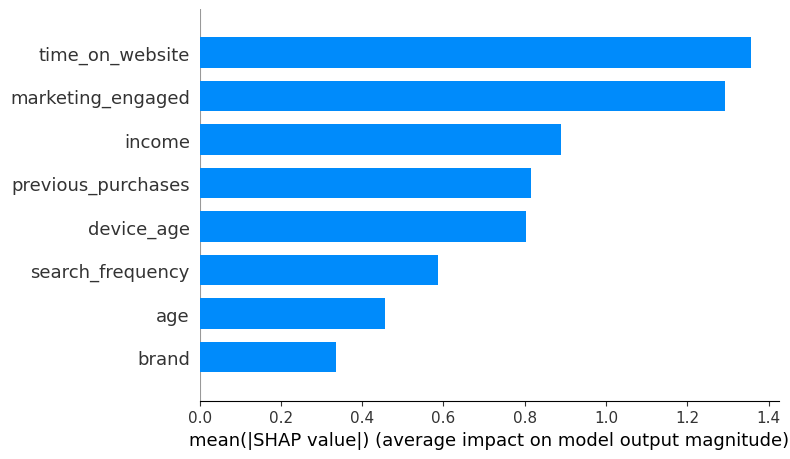

/tmp/ipython-input-39-1058417931.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


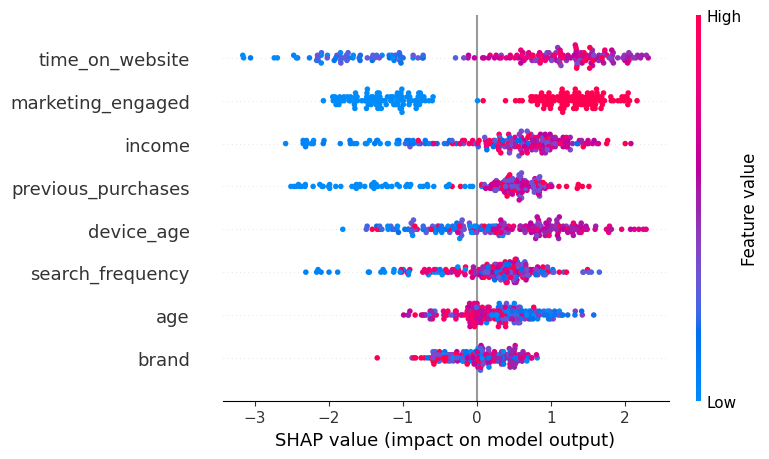

In [39]:
import shap

explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

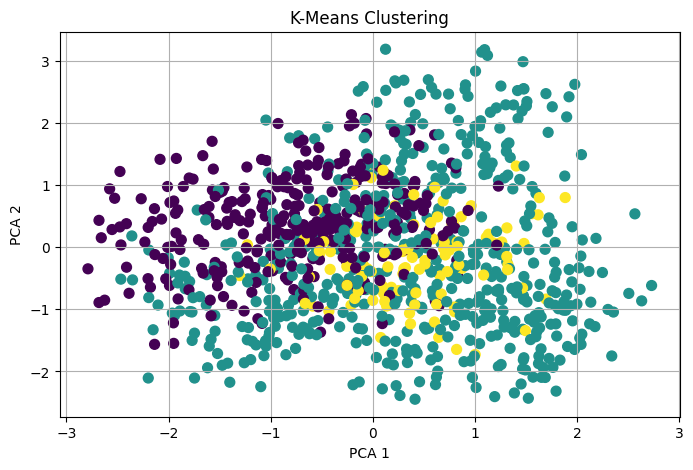

In [19]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


X = df.drop('will_purchase', axis=1)

X_encoded = pd.get_dummies(X, drop_first=True)

X_scaled = StandardScaler().fit_transform(X_encoded)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)


plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


X = df.drop('will_purchase', axis=1)
y = df['will_purchase']


X = pd.get_dummies(X, columns=['brand'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


print("Logistic Regression Accuracy:", model.score(X_test, y_test))

Logistic Regression Accuracy: 0.735


In [59]:
test_user = {
    'age': 30,
    'income': 70000,
    'time_on_website': 4.5,
    'brand': 'Samsung',
    'device_age':2,
    'search_frequency':4,
    'marketing_engaged': 1,
    'previous_purchases': 1
}


import pandas as pd
test_df = pd.DataFrame([test_user])

test_df = pd.get_dummies(test_df, columns=['brand'], drop_first=True).reindex(columns=X_encoded.columns, fill_value=0)

test_df = test_df[X_encoded.columns]

scaled_input = scaler.transform(test_df)


prediction = model.predict(scaled_input)
probability = model.predict_proba(scaled_input)


print("Prediction (Buy=1, Not Buy=0):", prediction[0])
print("Probability [Not Buy, Buy]:", probability[0])

Prediction (Buy=1, Not Buy=0): 1
Probability [Not Buy, Buy]: [0.276538 0.723462]


In [72]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop('will_purchase', axis=1)
y = df['will_purchase']

X_encoded = pd.get_dummies(X, columns=['brand'], drop_first=True)
columns_for_model = X_encoded.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_best = LogisticRegression()
model_best.fit(X_train, y_train)


phone1 = {'brand': 'iPhone'}
phone2 = {'brand': 'Samsung'}

phones_df = pd.DataFrame([phone1, phone2])

phones_encoded = pd.get_dummies(phones_df, columns=['brand'], drop_first=True)
phones_encoded = phones_encoded.reindex(columns=columns_for_model, fill_value=0)

phones_scaled = scaler.transform(phones_encoded)

probabilities = model_best.predict_proba(phones_scaled)[:, 1]


for i, (phone, prob) in enumerate(zip([phone1, phone2], probabilities)):
    print(f"\n📱 Phone {i+1} Brand: {phone['brand']}")
    print(f"   📈 Predicted Probability of Buying: {prob:.2f}")


if probabilities[0] > probabilities[1]:
    print(f"\n🏆 User more likely to buy {phone1['brand']}")
elif probabilities[0] < probabilities[1]:
    print(f"\n🏆 User more likely to buy {phone2['brand']}")
else:
    print("\n🤝 Both phones have equal likelihood of being purchased.")


📱 Phone 1 Brand: iPhone
   📈 Predicted Probability of Buying: 0.09

📱 Phone 2 Brand: Samsung
   📈 Predicted Probability of Buying: 0.14

🏆 User more likely to buy Samsung


In [73]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df.drop('will_purchase', axis=1)
y = df['will_purchase']

X_encoded = pd.get_dummies(X, columns=['brand'], drop_first=True)
columns_for_model = X_encoded.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_best = LogisticRegression()
model_best.fit(X_train, y_train)


phone1 = {'brand': 'OnePlus'}
phone2 = {'brand': 'Oppo'}

phones_df = pd.DataFrame([phone1, phone2])

phones_encoded = pd.get_dummies(phones_df, columns=['brand'], drop_first=True)
phones_encoded = phones_encoded.reindex(columns=columns_for_model, fill_value=0)

phones_scaled = scaler.transform(phones_encoded)

probabilities = model_best.predict_proba(phones_scaled)[:, 1]


for i, (phone, prob) in enumerate(zip([phone1, phone2], probabilities)):
    print(f"\n📱 Phone {i+1} Brand: {phone['brand']}")
    print(f"   📈 Predicted Probability of Buying: {prob:.2f}")


if probabilities[0] > probabilities[1]:
    print(f"\n🏆 User more likely to buy {phone1['brand']}")
elif probabilities[0] < probabilities[1]:
    print(f"\n🏆 User more likely to buy {phone2['brand']}")
else:
    print("\n🤝 Both phones have equal likelihood of being purchased.")


📱 Phone 1 Brand: OnePlus
   📈 Predicted Probability of Buying: 0.14

📱 Phone 2 Brand: Oppo
   📈 Predicted Probability of Buying: 0.11

🏆 User more likely to buy OnePlus
